In [1]:
#1
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [5]:
from sklearn.datasets import load_iris
iris=load_iris()

In [14]:
y=iris.target
x=iris.data

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
knn=KNeighborsClassifier()

In [22]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [24]:
y_pred=knn.predict(x_test)

In [25]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(confusion_matrix(y_pred,y_test))
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [26]:
#2
from sklearn.datasets import load_boston
iris=load_boston()

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


In [29]:
from sklearn.neighbors import KNeighborsClassifier
reg=KNeighborsClassifier()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)

In [30]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(confusion_matrix(y_pred,y_test))
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



C:\Users\madhu\AppData\Local\Temp\ipykernel_3424\3129653067.py:42: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axes[i].scatter(x_test_2d[:, 0], x_test_2d[:, 1], c=y_test,
C:\Users\madhu\AppData\Local\Temp\ipykernel_3424\3129653067.py:42: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axes[i].scatter(x_test_2d[:, 0], x_test_2d[:, 1], c=y_test,
C:\Users\madhu\AppData\Local\Temp\ipykernel_3424\3129653067.py:42: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axes[i].scatter(x_test_2d[:, 0], x_test_2d[:, 1], c=y_test,
C:\Users\madhu\AppData\Local\Temp\ipykernel_34

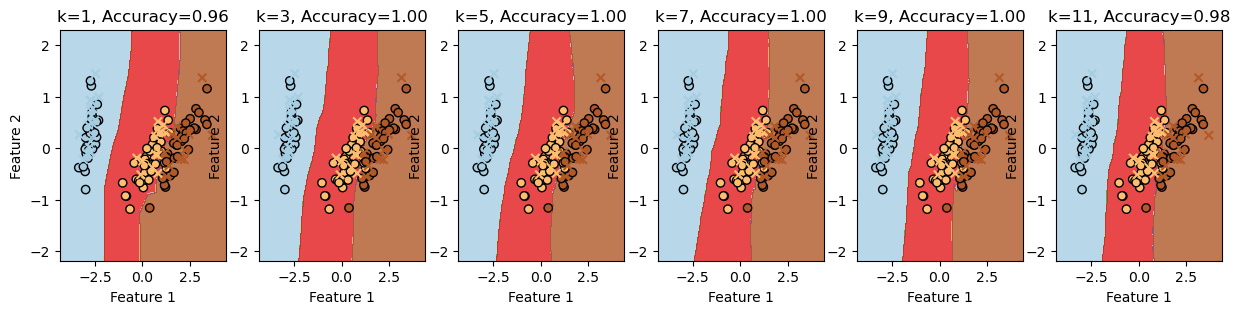

In [34]:
#3
from sklearn.decomposition import PCA

# Reduce the features to 2 dimensions for visualization
pca = PCA(n_components=2)
x_train_2d = pca.fit_transform(x_train)
x_test_2d = pca.transform(x_test)

# Create subplots for each k value
fig, axes = plt.subplots(1, len(k_values), figsize=(15, 3))

for i, k in enumerate(k_values):
    # Create KNN model
    knn = KNeighborsClassifier(n_neighbors=k)

    # Train the model on the reduced data
    knn.fit(x_train_2d, y_train)

    # Make predictions
    y_pred = knn.predict(x_test_2d)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Plot decision boundary
    h = 0.02  # Step size in the mesh
    x_min, x_max = x_train_2d[:, 0].min() - 1, x_train_2d[:, 0].max() + 1
    y_min, y_max = x_train_2d[:, 1].min() - 1, x_train_2d[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    axes[i].contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

    # Plot the training points
    axes[i].scatter(x_train_2d[:, 0], x_train_2d[:, 1], c=y_train,
                    edgecolors='k', cmap=plt.cm.Paired)

    # Plot the testing points
    axes[i].scatter(x_test_2d[:, 0], x_test_2d[:, 1], c=y_test,
                    marker='x', edgecolors='k', cmap=plt.cm.Paired)

    # Set plot labels and title
    axes[i].set_title(f'k={k}, Accuracy={accuracy:.2f}')
    axes[i].set_xlabel('Feature 1')
    axes[i].set_ylabel('Feature 2')

plt.show()


In [35]:
#4
from sklearn.datasets import load_boston

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


In [ ]:
#5
# Python3 program to implement the 
# weighted K nearest neighbour algorithm. 

import math 

def weightedkNN(points,p,k=3): 
	''' 
	This function finds classification of p using 
	weighted k nearest neighbour algorithm. It assumes only two 
	two classes and returns 0 if p belongs to class 0, else 
	1 (belongs to class 1). 

	Parameters - 
		points : Dictionary of training points having two keys - 0 and 1 
			Each key have a list of training data points belong to that 

		p : A tuple ,test data point of form (x,y) 

		k : number of nearest neighbour to consider, default is 3 
	'''

	distance=[] 
	for group in points: 
		for feature in points[group]: 

			#calculate the euclidean distance of p from training points 
			euclidean_distance = math.sqrt((feature[0]-p[0])**2 +(feature[1]-p[1])**2) 

			# Add a tuple of form (distance,group) in the distance list 
			distance.append((euclidean_distance,group)) 

	# sort the distance list in ascending order 
	# and select first k distances 
	distance = sorted(distance)[:k] 

	freq1 = 0 # weighted sum of group 0 
	freq2 = 0 # weighted sum of group 1 

	for d in distance: 
		if d[1] == 0: 
			freq1 += (1 / d[0]) 
			
		elif d[1] == 1: 
			freq2 += (1 /d[0]) 
			

	return 0 if freq1>freq2 else 1

# Driver function 
def main(): 

	# Dictionary of training points having two keys - 0 and 1 
	# key 0 have points belong to class 0 
	# key 1 have points belong to class 1 

	points = {0:[(0, 4),(1, 4.9),(1.6, 5.4),(2.2, 6),(2.8, 7),(3.2, 8),(3.4, 9)], 
			1:[(1.8, 1),(2.2, 3),(3, 4),(4, 4.5),(5, 5),(6, 5.5)]} 

	# query point p(x,y) 
	p = (2, 4) 

	# Number of neighbours 
	k = 5

	print("The value classified to query point is: {}".format(weightedkNN(points,p,k))) 

if __name__ == '__main__': 
	main() 


In [ ]:
#6
def standardization(df):
    for i in df.columns:
        for j in range (df.shape[0]):
            df[i][j]=(df[i][j]-df[i].mean())/df[i].std()

In [ ]:
#7
def euclidean_dist(x,y):
    distance=np.sqrt(x**2+y**2)
    return distance

In [ ]:
#8
def manhattan_distance(x1,x2,y1,y2):
    distance=abs(x1-x2)+abs(y1-y2)
    return distance